In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2022-06-30 14:25:23--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2022-06-30 14:25:23 (162 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [2]:
import json

with open('./sarcasm.json','r') as f:
  d = json.load(f)

  s=[]
  l=[]

  for i in d:
    s.append(i['headline'])
    l.append(i['is_sarcastic'])

In [4]:
ts = 20000
vs = 10000
ml = 32
ed = 16

In [6]:
tt = 'post'
pt = tt
ot = '<x>'

In [5]:
rs = s[0:ts]
es = s[ts:]

rl = l[0:ts]
el = l[ts:]

In [7]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

t = Tokenizer(num_words=vs,oov_token=ot)
t.fit_on_texts(rs)
w = t.word_index

q = t.texts_to_sequences(rs)
p = pad_sequences(q,maxlen=ml,padding=pt,truncating=tt)

eq = t.texts_to_sequences(es)
ep = pad_sequences(eq,maxlen=ml,padding=pt,truncating=tt)

rl = np.array(rl)
el = np.array(el)

In [12]:
import tensorflow as tf
g = tf.keras.layers.GlobalAveragePooling1D()

sa = np.array([[[10,2],[1,3],[1,1]]])
oa = g(sa)

print(sa)
print()
print(oa)

[[[10  2]
  [ 1  3]
  [ 1  1]]]

tf.Tensor([[4 2]], shape=(1, 2), dtype=int64)


In [13]:
m = tf.keras.Sequential([
    tf.keras.layers.Embedding(vs,ed,input_length=ml),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

m.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 16)            160000    
                                                                 
 global_average_pooling1d_5   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [14]:
ne = 30
hist = m.fit(p,rl,epochs=ne,validation_data=(ep,el))

Epoch 1/30
625/625 [==============================] - 4s 5ms/step - loss: 0.5553 - accuracy: 0.7051 - val_loss: 0.3912 - val_accuracy: 0.8404
Epoch 2/30
625/625 [==============================] - 3s 4ms/step - loss: 0.3091 - accuracy: 0.8730 - val_loss: 0.3419 - val_accuracy: 0.8526
Epoch 3/30
625/625 [==============================] - 3s 5ms/step - loss: 0.2318 - accuracy: 0.9090 - val_loss: 0.3424 - val_accuracy: 0.8535
Epoch 4/30
625/625 [==============================] - 3s 5ms/step - loss: 0.1866 - accuracy: 0.9302 - val_loss: 0.3695 - val_accuracy: 0.8475
Epoch 5/30
625/625 [==============================] - 3s 4ms/step - loss: 0.1551 - accuracy: 0.9424 - val_loss: 0.3868 - val_accuracy: 0.8508
Epoch 6/30
625/625 [==============================] - 3s 5ms/step - loss: 0.1298 - accuracy: 0.9554 - val_loss: 0.4287 - val_accuracy: 0.8441
Epoch 7/30
625/625 [==============================] - 3s 5ms/step - loss: 0.1108 - accuracy: 0.9623 - val_loss: 0.4792 - val_accuracy: 0.8360
Epoch 

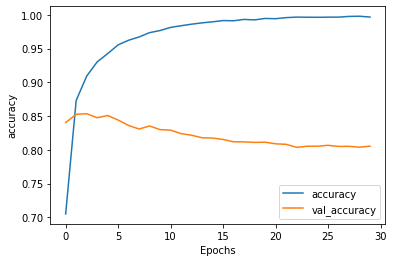

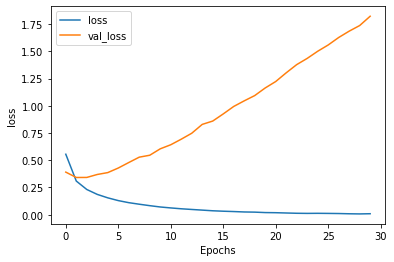

In [15]:
import matplotlib.pyplot as plt

def pg(h,s):
  plt.plot(h.history[s])
  plt.plot(h.history['val_'+s])
  plt.xlabel('Epochs')
  plt.ylabel(s)
  plt.legend([s,'val_'+s])
  plt.show()

pg(hist,'accuracy')
pg(hist,'loss')

In [16]:
rwi = t.index_word
el = m.layers[0]
ew = el.get_weights()[0]

print(ew.shape)

(10000, 16)


In [17]:
import io

ov = io.open('vecs.tsv','w',encoding='utf-8')
om = io.open('meta.tsv','w',encoding='utf-8')

for i in range(1,vs):
  wn = rwi[i]
  we = ew[i]

  om.write(wn+'\n')
  ov.write('\t'.join([str(x) for x in we])+'\n')
  
om.close()
ov.close()

In [18]:
from google.colab import files
files.download('vecs.tsv')
files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>